# Лабораторная работа №3

#### Импорт ввсех необходимых модулей

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import lib.rungekutta as rk # наша локальная библиотека, реализует явные методы Рунге-Кутты
from lib.RungeKuttaFour import RungeKuttaFour
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = (12.0, 7.0)
#rcParams['figure.dpi'] = 50
rcParams['font.size'] = 18

## *Задание №1*

In [3]:
def integrate(x0, y0, z0, h, n):
    a, b, c = [y0], [z0], [x0]
    for i in np.arange(0,n,1):
        k1x, k1y, k1z = x0 + i*h, y0, z0 
        k1 = k1z
        k2x, k2y, k2z = x0 + i*h + 0.5*h, y0 + 0.5*k1*h, z0 + 0.5*k1*h
        k2 = k2z
        k3x, k3y, k3z = x0 + i*h + 0.5*h, y0 + 0.5*k2*h, z0 + 0.5*k2*h
        k3 = k3z
        k4x, k4y, k4z = x0 + i*h + h, y0 + k3*h, z0 + k3*h
        k4 = k4z
        y1 = y0 + (1/6.0)*(k1 + 2*k2 + 2*k3 + k4)*h 
        k1 = -k1y
        k2x, k2y, k2z = x0 + i*h + 0.5*h, y0 + 0.5*k1*h, z0 + 0.5*k1*h
        k2 = -k2y
        k3x, k3y, k3z = x0 + i*h + 0.5*h, y0 + 0.5*k2*h, z0 + 0.5*k2*h
        k3 = -k3y
        k4x, k4y, k4z = x0 + i*h + h, y0 + k3*h, z0 + k3*h
        k4 = -k4y
        z1 = z0 + (1/6.0)*(k1 + 2*k2 + 2*k3 + k4)*h
        y0, z0 = y1, z1
        a.append(y1)
        b.append(z1)
        c.append(k1x+h)

    return a, b, c

## *Задание №2*

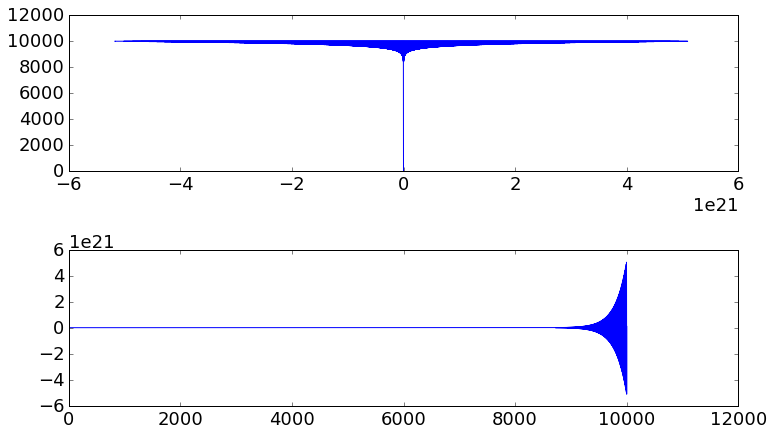

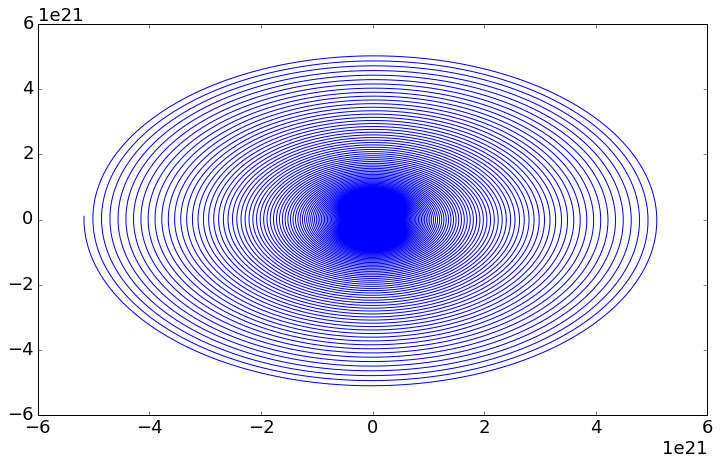

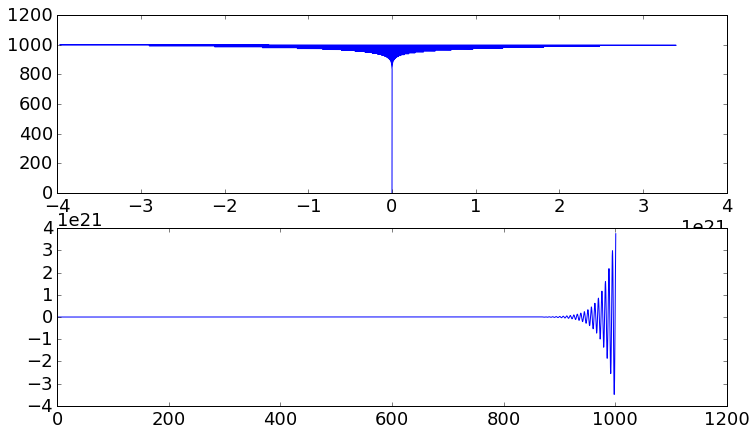

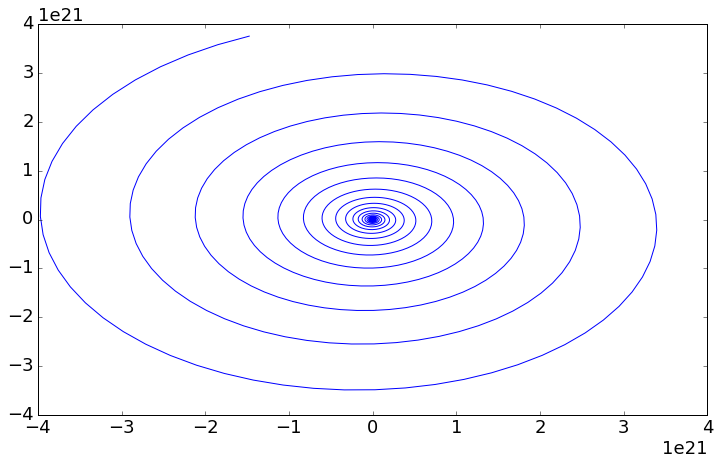

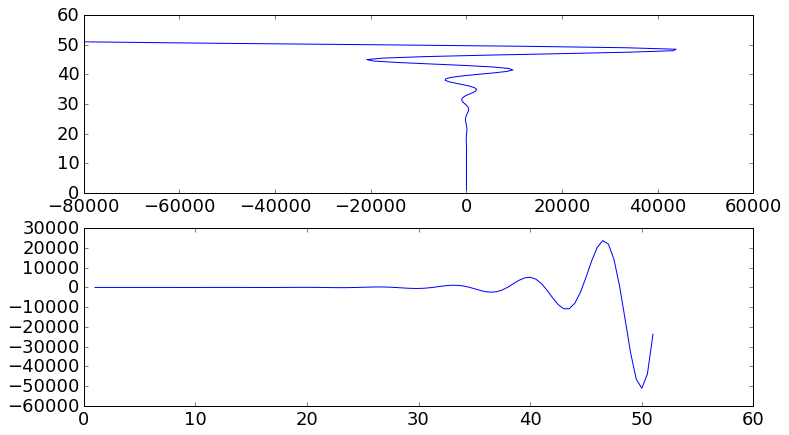

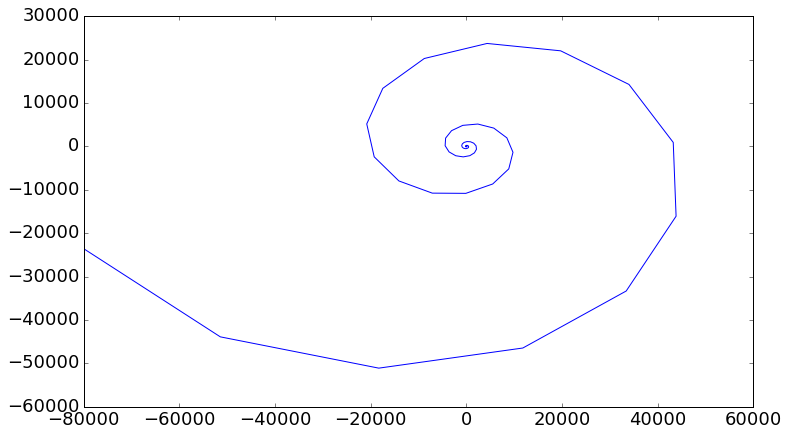

In [4]:
plt.figure(0).subplots_adjust(hspace=.5, wspace=.35)

x, y, t = integrate(1, 1, 0, 0.01, 1000000)

fig = plt.figure(0)
ax = fig.add_subplot(2,1,1)
ax.plot(x, t)
ax = fig.add_subplot(2,1,2)
ax.plot(t, y)
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.plot(x, y)

x, y, t = integrate(1., 1., 0., 0.1, 10000)

fig = plt.figure(2)
ax = fig.add_subplot(2,1,1)
ax.plot(x, t)
ax = fig.add_subplot(2,1,2)
ax.plot(t, y)
fig = plt.figure(3)
ax = fig.add_subplot(1,1,1)
ax.plot(x, y)

x, y, t = integrate(1., 1., 0., 0.5, 100)

fig = plt.figure(4)
ax = fig.add_subplot(2,1,1)
ax.plot(x, t)
ax = fig.add_subplot(2,1,2)
ax.plot(t, y)
fig = plt.figure(5)
ax = fig.add_subplot(1,1,1)
ax.plot(x, y)


## *Задание №3*

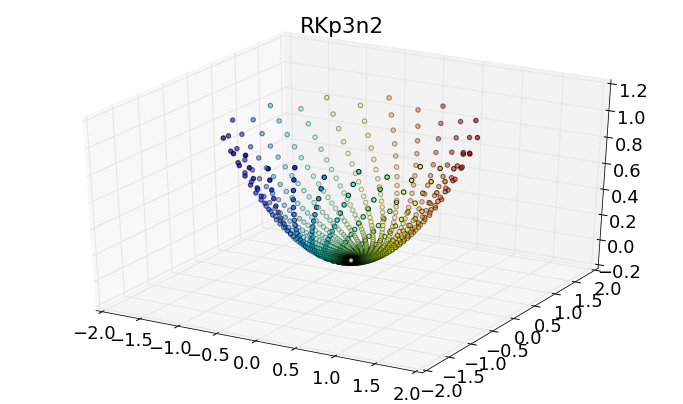

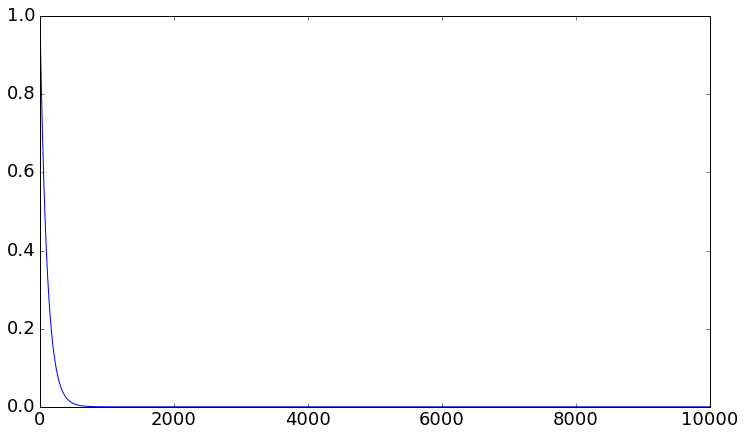

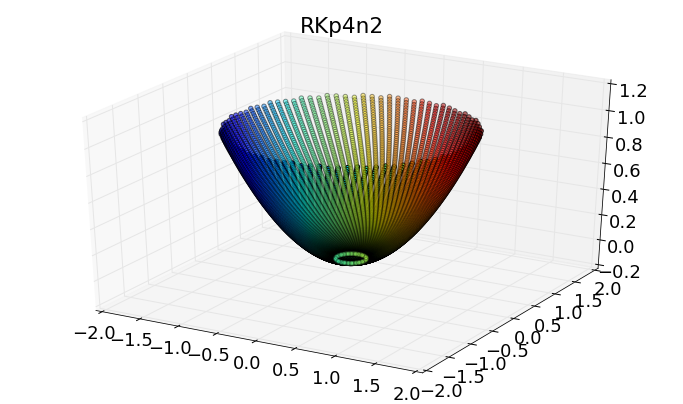

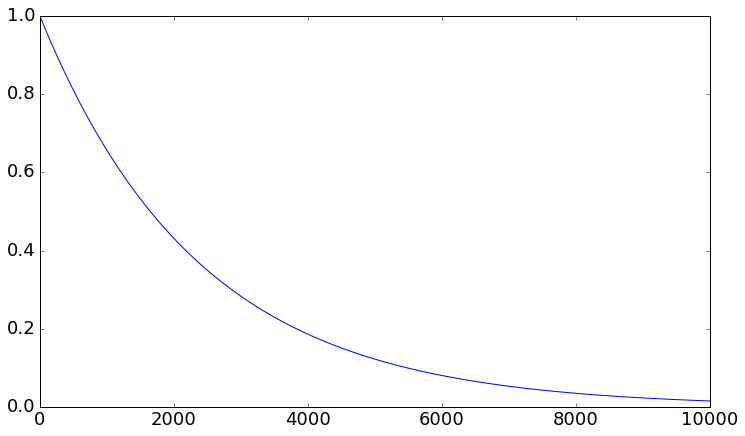

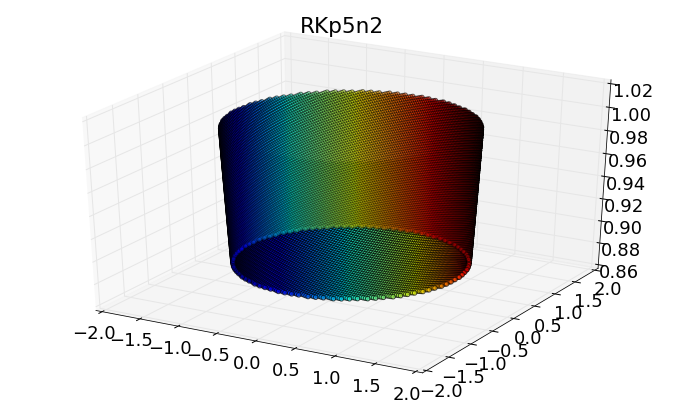

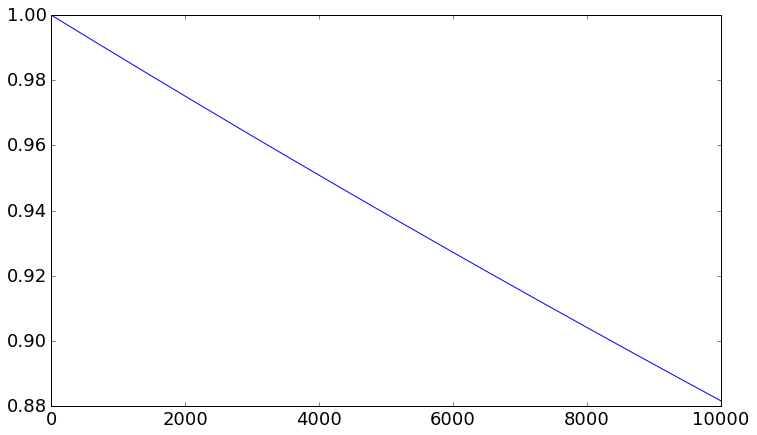

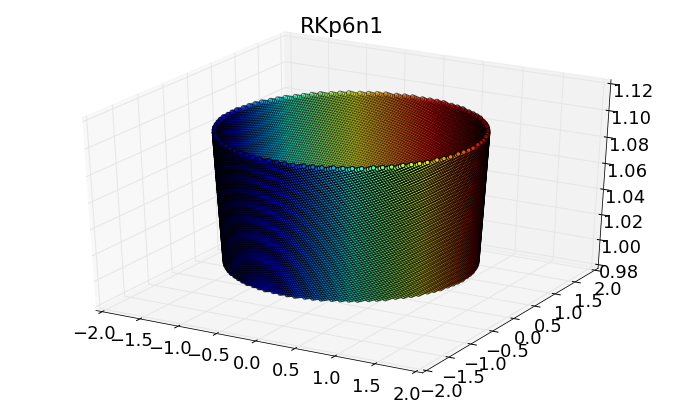

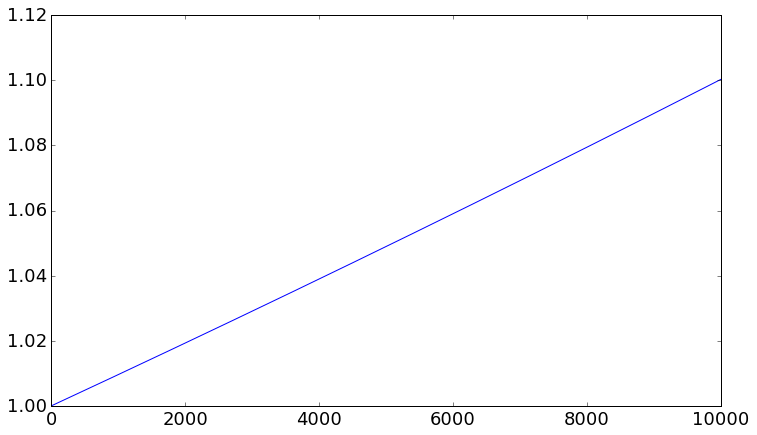

In [5]:
def F2(t, x, p):
    return (-x[1], x[0])

RungeKuttas =[
    {'type': 'RKp3n2', 't': None, 'x': None},
    {'type': 'RKp4n2', 't': None, 'x': None},
    {'type': 'RKp5n2', 't': None, 'x': None},
    {'type': 'RKp6n1', 't': None, 'x':None}
]

x_0 = [1.0, 1.0]
time = (0.0, 10000.0)
h = 0.5

for RungeKutta in RungeKuttas:
    RK = rk.RK(2, RungeKutta['type'])
    RungeKutta['t'], RungeKutta['x'] = RK.integrate(F2, x_0, time, h)
    
def H(x, y):
    '''Функция Гамильтона (полная энергия)'''
    return 0.5*(x**2 + y**2)

number = 0

for RungeKutta in RungeKuttas:
    fig = plt.figure(number)
    number += 1
    ax = plt.axes(projection='3d')
    ax.set_title(RungeKutta['type'])

    x = RungeKutta['x'][0]
    y = RungeKutta['x'][1]

    z = [H(x, y) for x, y in zip(x,y)]

    ax.scatter(x, y, z, c = x + y)
    
    fig = plt.figure(number)
    number += 1
    ax = fig.add_subplot(111)
    ax.plot(RungeKutta['t'], z)
